In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [76]:
#only for representation purpose, viewing the data as pandas dataframe
data=fetch_california_housing(as_frame=True)
X=data.data
y=data.target
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [158]:
housing=fetch_california_housing(as_frame=False)  # notice how we are not using pandas here
X=housing.data
y=housing.target
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

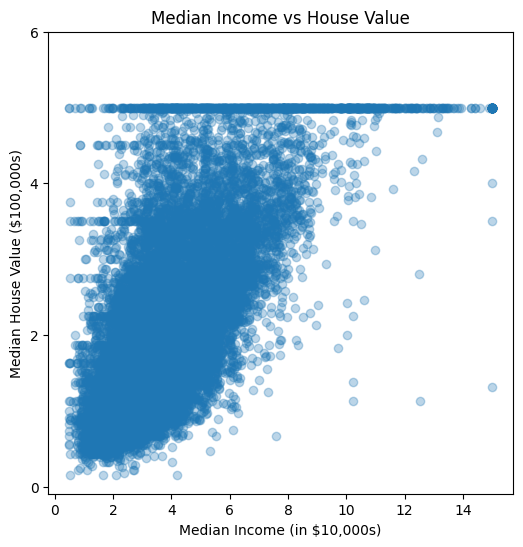

In [190]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=False)
X = housing.data
y = housing.target

medinc_index = housing.feature_names.index("MedInc")

# Visualize the strongest relationship: Median Income vs House Value
plt.figure(figsize=(6,6))
# Use the integer index for the MedInc column
plt.scatter(X[:, medinc_index], y, alpha=0.3)
plt.xlabel("Median Income (in $10,000s)")
plt.ylabel("Median House Value ($100,000s)")
plt.title("Median Income vs House Value")
plt.yticks([0, 2, 4, 6])
plt.show()


In [159]:
# X=X[:, [0,1,2]]
# X.shape


In [160]:
#normalising the input data, X
def minmax(X):
    X_scaled = np.zeros_like(X)
    for i in range(X.shape[1]):
        X_scaled[:, i]=(X[:, i]-np.min(X[:, i]))/(np.max(X[:, i])-np.min(X[:, i]))
    return X_scaled   

In [163]:
X_scaled=minmax(X)
X_scaled

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]], shape=(20640, 8))

In [164]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [165]:
def initialise():
    np.random.seed(10)
    w=np.random.rand(X.shape[1])
    b=np.random.rand()

    return w, b

In [166]:
def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [167]:
def prediction(x,w,b):
    return np.dot(x,w)+b

In [168]:
def train_model(X, y, epochs, alpha, n,w, b):
    for i in range(epochs):
        y_pred=prediction(X,w, b)
        dw=(-2/n)*np.dot(X.T, (y-y_pred))
        db=(-2/n)*np.sum((y-y_pred))
        w=w-alpha*dw
        b=b-alpha*db

        if(i%100==0):
            print("loss=", mse(y, y_pred))
    return w, b

In [176]:
epochs=30000
alpha=0.1
n=X_train.shape[0]
w,b=initialise()
w, b=train_model(X_train, y_train, epochs, alpha, n,w, b)
w, b

loss= 2.704489927032725
loss= 0.9131116601741776
loss= 0.767893386884225
loss= 0.6903189034928572
loss= 0.6476676513828461
loss= 0.6231609157186785
loss= 0.6081709778846125
loss= 0.5982534140720359
loss= 0.5911121484810491
loss= 0.585554988154714
loss= 0.5809574331052832
loss= 0.5769873713732276
loss= 0.5734636887243116
loss= 0.5702836214526736
loss= 0.5673854001002162
loss= 0.564729012988883
loss= 0.5622862753924853
loss= 0.5600356797319767
loss= 0.5579597039943406
loss= 0.5560433857734915
loss= 0.554273549477123
loss= 0.5526383720505035
loss= 0.5511271254519572
loss= 0.5497300126090443
loss= 0.5484380538937753
loss= 0.5472430018630289
loss= 0.5461372726555727
loss= 0.5451138879159808
loss= 0.5441664239416351
loss= 0.5432889662120561
loss= 0.5424760682223246
loss= 0.5417227139443724
loss= 0.5410242834560668
loss= 0.5403765213979415
loss= 0.5397755079872856
loss= 0.5392176323627811
loss= 0.5386995680622022
loss= 0.5382182504572182
loss= 0.537770855986319
loss= 0.537354783041074
loss= 0

(array([ 5.46913884,  0.4804926 ,  0.34884997,  3.77282108, -0.11232482,
        -0.74500848, -4.37797717, -4.7481613 ]),
 np.float64(4.144428494749769))

In [182]:
print(np.column_stack((prediction(X_test, w, b), y_test)))

[[2.92977979 1.674     ]
 [2.49126405 3.541     ]
 [2.20971941 1.602     ]
 ...
 [2.34992653 1.313     ]
 [1.27553674 0.923     ]
 [3.68163813 5.00001   ]]


In [179]:
from sklearn.linear_model import LinearRegression
import numpy as np

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set
y_pred_sklearn = model.predict(X_test)

# view both arrays side by side
print(np.column_stack((y_pred_sklearn[:10], y_test[:10])))


[[3.00511808 1.674     ]
 [2.56692165 3.541     ]
 [2.33800105 1.602     ]
 [1.71407997 1.408     ]
 [1.76334162 1.078     ]
 [0.77485129 1.188     ]
 [2.18514506 1.549     ]
 [2.24346327 2.081     ]
 [1.15700777 0.923     ]
 [3.39072454 4.04      ]]


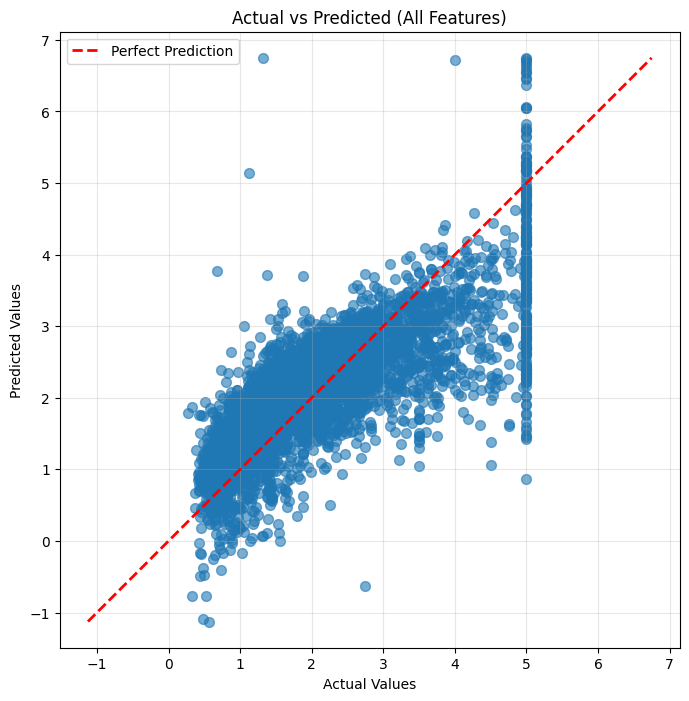

In [192]:
y_pred = prediction(X_test, w, b).flatten()
y_test_flat = y_test.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_flat, y_pred, alpha=0.6, s=50)

# Perfect prediction line (45 degree)
min_val = min(y_test_flat.min(), y_pred.min())
max_val = max(y_test_flat.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (All Features)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()